<a href="https://colab.research.google.com/github/aibak365/Machine-learning/blob/main/FoodDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [100]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"
if image_path.is_dir():
  print("no need")
else:
  print("we need to download it")
  image_path.mkdir(parents=True,exist_ok=True)
with open(data_path/ "pizza_steak_sushi.zip","wb") as fl:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("downlading .............")
  fl.write(request.content)
with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r") as extract:
  print("unzip.........")
  extract.extractall(image_path)

no need
downlading .............
unzip.........


In [101]:
import os
def walk_through(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} dirs and {len(filenames)} images in {dirpath}")
walk_through(image_path)

there are 2 dirs and 0 images in data/pizza_steak_sushi
there are 3 dirs and 0 images in data/pizza_steak_sushi/train
there are 0 dirs and 72 images in data/pizza_steak_sushi/train/sushi
there are 0 dirs and 75 images in data/pizza_steak_sushi/train/steak
there are 0 dirs and 78 images in data/pizza_steak_sushi/train/pizza
there are 3 dirs and 0 images in data/pizza_steak_sushi/test
there are 0 dirs and 31 images in data/pizza_steak_sushi/test/sushi
there are 0 dirs and 19 images in data/pizza_steak_sushi/test/steak
there are 0 dirs and 25 images in data/pizza_steak_sushi/test/pizza


In [102]:
train_dir = image_path/ "train"
test_dir = image_path/ "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/train/sushi/2590819.jpg
sushi
Random image path: data/pizza_steak_sushi/train/sushi/2590819.jpg
 image class: sushi
image width and hieght (512, 512)


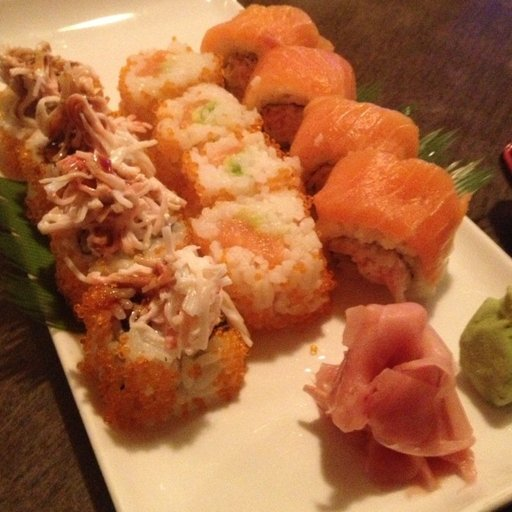

In [103]:
import random
from PIL import Image

random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
print(random_image_path)
image_class = random_image_path.parent.stem
print(image_class)
img = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f" image class: {image_class}")
print(f"image width and hieght {img.width,img.height}")
img

[[[194 152 110]
  [192 150 108]
  [189 148 104]
  ...
  [ 87  52  59]
  [ 90  55  62]
  [ 99  64  71]]

 [[189 147 105]
  [188 147 103]
  [186 145 101]
  ...
  [ 89  54  61]
  [ 92  57  64]
  [ 97  62  69]]

 [[185 144 100]
  [185 144 100]
  [184 143  99]
  ...
  [ 93  58  64]
  [ 99  62  69]
  [ 99  62  69]]

 ...

 [[ 75  47  26]
  [ 73  45  24]
  [ 72  44  22]
  ...
  [ 15  10   7]
  [ 14  10   7]
  [ 13   9   6]]

 [[ 72  41  21]
  [ 74  43  23]
  [ 76  45  24]
  ...
  [ 16  12   9]
  [ 16  12   9]
  [ 13  12   7]]

 [[ 69  38  18]
  [ 74  43  23]
  [ 79  48  27]
  ...
  [ 15  11   8]
  [ 13  12   8]
  [ 14  13   8]]]


Text(0.5, 1.0, 'Image class: sushi image shape: (512, 512, 3)')

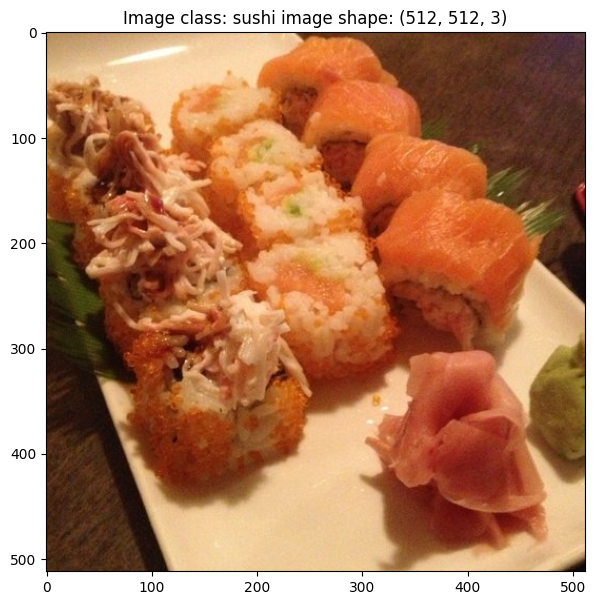

In [104]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
print(img_as_array)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} image shape: {img_as_array.shape}")


In [105]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose(
    [transforms.Resize(size=(64,64)),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.ToTensor()
    ]
)
data_transform(img),data_transform(img).shape

(tensor([[[0.7294, 0.7373, 0.7373,  ..., 0.3137, 0.3216, 0.3608],
          [0.7569, 0.7686, 0.7725,  ..., 0.3059, 0.3137, 0.3333],
          [0.7882, 0.8000, 0.8196,  ..., 0.3059, 0.3255, 0.3216],
          ...,
          [0.3020, 0.2902, 0.3059,  ..., 0.9255, 0.9216, 0.9020],
          [0.2706, 0.2706, 0.2745,  ..., 0.8902, 0.7843, 0.6000],
          [0.2824, 0.2745, 0.2863,  ..., 0.6431, 0.3686, 0.1686]],
 
         [[0.5725, 0.5804, 0.5882,  ..., 0.1882, 0.1961, 0.2235],
          [0.5961, 0.6118, 0.6235,  ..., 0.1804, 0.1922, 0.2000],
          [0.6353, 0.6471, 0.6588,  ..., 0.1882, 0.2000, 0.1961],
          ...,
          [0.1725, 0.1569, 0.1725,  ..., 0.7725, 0.7804, 0.7490],
          [0.1569, 0.1529, 0.1569,  ..., 0.7490, 0.6431, 0.4627],
          [0.1765, 0.1608, 0.1686,  ..., 0.5137, 0.2667, 0.1020]],
 
         [[0.3765, 0.3843, 0.3922,  ..., 0.2549, 0.2471, 0.2510],
          [0.4039, 0.4196, 0.4392,  ..., 0.2392, 0.2392, 0.2431],
          [0.4510, 0.4588, 0.4745,  ...,

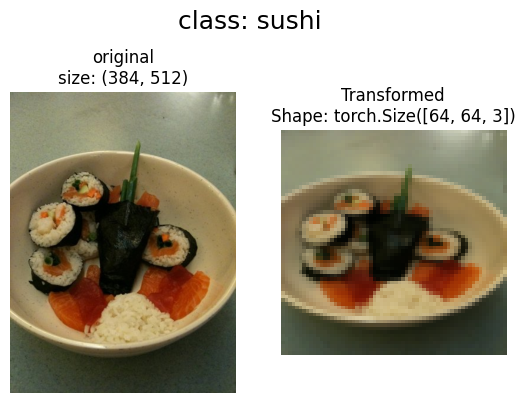

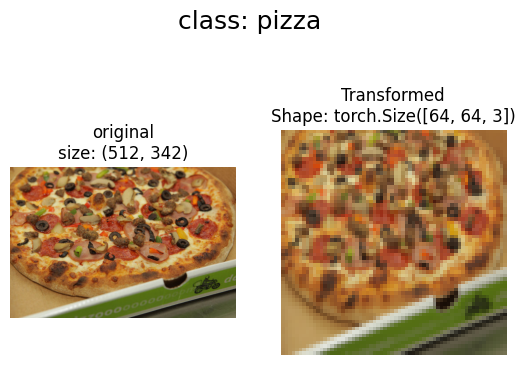

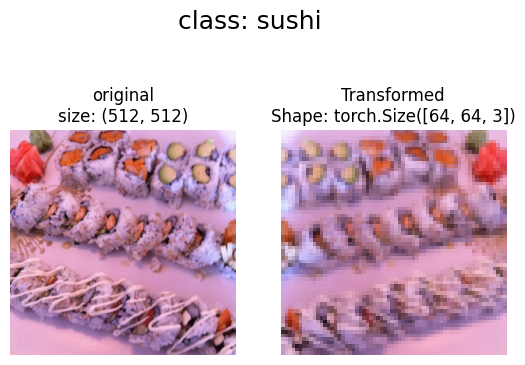

In [106]:
def plot_transformed_images(image_paths, transform, n =3 , seed=None):
  if seed:random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"original\nsize: {f.size}")
      ax[0].axis(False)
      transform_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transform_image)
      ax[1].set_title(f"Transformed\nShape: {transform_image.shape}") # C,H, W -> H, W, C
      ax[1].axis("off")
      fig.suptitle(f"class: {image_path.parent.stem}", fontsize=18)
plot_transformed_images(image_paths = image_path_list, transform=data_transform, n=3, seed=1)

In [107]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform,target_transform=None)
train_data,test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [108]:
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_names, class_dict, len(train_data), len(test_data)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2}, 225, 75)

original shape: torch.Size([3, 64, 64])
image permute: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

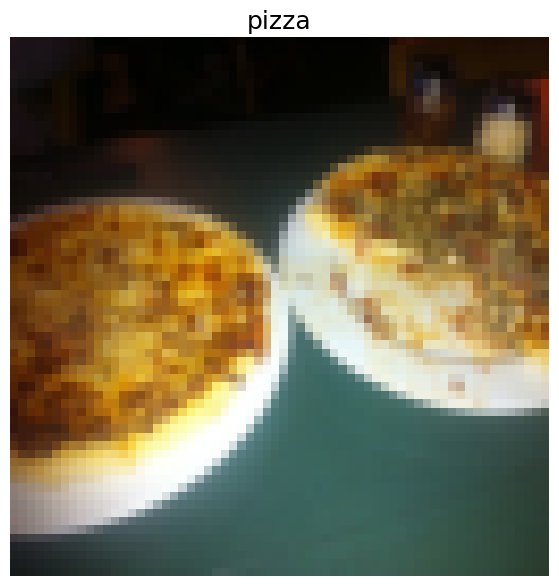

In [109]:
img,label = train_data[0][0], train_data[0][1]
img_permute = img.permute(1,2,0)
print(f"original shape: {img.shape}")
print(f"image permute: {img_permute.shape}")
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label],fontsize=18)

In [110]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers = os.cpu_count(),
                              shuffle=True
                              )
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)
train_dataloader, test_dataloader, len(train_data), len(test_data)

(<torch.utils.data.dataloader.DataLoader at 0x7d270011db40>,
 225,
 75)

In [111]:
from matplotlib.pyplot import imshow

img, label = next(iter(train_dataloader))
print(f"image shape: {img.shape}")
print(f"label shape: {label.shape}")


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


image shape: torch.Size([1, 3, 64, 64])
label shape: torch.Size([1])


In [112]:
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from typing import Tuple, Dict, List

In [113]:
target_directory = train_dir
print(f"Target dir: {target_directory}")
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [114]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]]:
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir)
  if not classes: raise FileNotFoundError(f"no file in {directory}")
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [115]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  def __init__(self, targ_dir:str, transform=None):
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transforms = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)
  def load_image(self, index:int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)
  def __len__(self) -> int:
    return len(self.paths)
  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img), class_idx



In [116]:
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [117]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform=train_transforms)
train_data_custom, test_data_custom,

(<__main__.ImageFolderCustom at 0x7d2700286cb0>,
 <__main__.ImageFolderCustom at 0x7d2700285d20>)

In [118]:
print(train_data_custom.classes == train_data.classes)

True


In [119]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)
train_dataloader_custom,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7d27002abb20>,
 <torch.utils.data.dataloader.DataLoader at 0x7d27002a98a0>)

In [120]:
# Data Augmentation is the process of artifically adding diversity to your training data (here it means aplying various image transforms on the image)
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()])

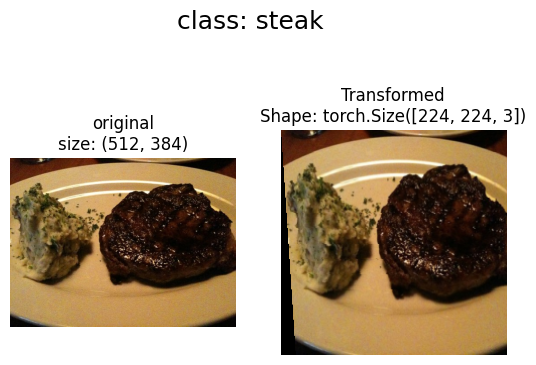

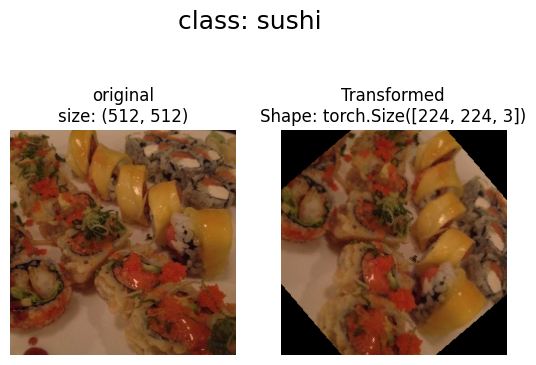

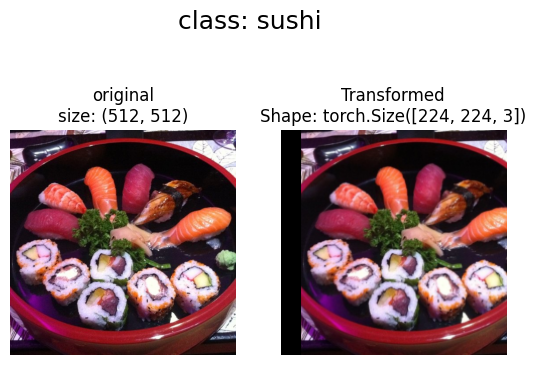

In [121]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None

)

In [122]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [123]:
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,transform=simple_transform)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers= NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers= NUM_WORKERS)

In [124]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [125]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [126]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [127]:
model_0(image_batch.to(device))

tensor([[0.0578, 0.0634, 0.0351],
        [0.0657, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0376],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0349],
        [0.0620, 0.0599, 0.0371],
        [0.0607, 0.0628, 0.0387],
        [0.0638, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0689, 0.0330],
        [0.0557, 0.0571, 0.0356],
        [0.0632, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0368],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0637, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

In [128]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer):
  model.train()
  train_loss, train_acc = 0,0
  for batch, (X,y) in enumerate(dataloader):
    x,y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class= torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc+=(y_pred_class==y).sum().item()/len(y_pred)
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [129]:
def test_step(model:torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device):
  model.eval()
  test_loss, test_acc = 0,0
  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X,y = X.to(device), y.to(device)
      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits,y)
      test_loss+=loss.item()
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc+=((test_pred_labels==y).sum().item()/len(test_pred_labels))
  test_loss = test_loss/len(dataloader)
  test_acc =test_acc/len(dataloader)

  return test_loss, test_acc

In [130]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [131]:
train_transforms_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transforms_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [132]:
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transforms_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transforms_trivial)

In [133]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d27001f2650>,
 <torch.utils.data.dataloader.DataLoader at 0x7d270a3d0e20>)

In [134]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [135]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.1379 | train_acc: 0.0312 | test_loss: 1.0657 | test_acc: 0.5417
Epoch: 2 | train_loss: 0.1362 | train_acc: 0.0508 | test_loss: 1.0432 | test_acc: 0.5417
Epoch: 3 | train_loss: 0.1383 | train_acc: 0.0391 | test_loss: 1.0373 | test_acc: 0.5417
Epoch: 4 | train_loss: 0.1438 | train_acc: 0.0312 | test_loss: 1.0442 | test_acc: 0.5417
Epoch: 5 | train_loss: 0.1372 | train_acc: 0.0430 | test_loss: 1.0530 | test_acc: 0.5417


In [136]:
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.1370 | train_acc: 0.0312 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 2 | train_loss: 0.1373 | train_acc: 0.0352 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 3 | train_loss: 0.1372 | train_acc: 0.0430 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 4 | train_loss: 0.1370 | train_acc: 0.0430 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 5 | train_loss: 0.1374 | train_acc: 0.0312 | test_loss: 1.1037 | test_acc: 0.2083


In [137]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
print(model_0_df)
model_1_df

   train_loss  train_acc  test_loss  test_acc
0    0.136991   0.031250   1.103727  0.208333
1    0.137268   0.035156   1.103727  0.208333
2    0.137229   0.042969   1.103727  0.208333
3    0.137027   0.042969   1.103727  0.208333
4    0.137395   0.031250   1.103727  0.208333


,train_loss,train_acc,test_loss,test_acc
0,0.137888,0.031250,1.065686,0.541667
1,0.136175,0.050781,1.043178,0.541667
2,0.138265,0.039062,1.037313,0.541667
3,0.143841,0.031250,1.044224,0.541667
4,0.137159,0.042969,1.052981,0.541667


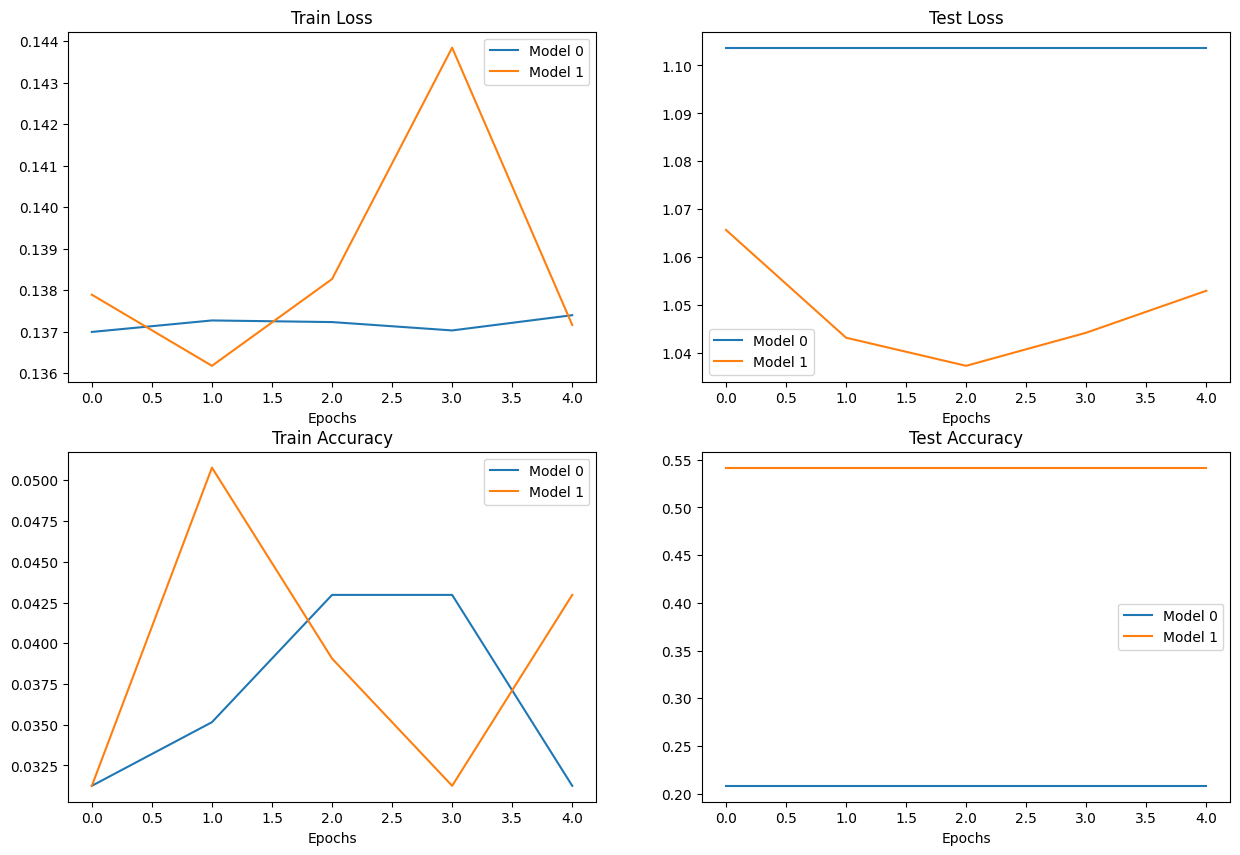

In [138]:
# I just copied it :)
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

In [143]:
import requests

custom_image_path = data_path/"04-pizza-dad.jpeg"
if not custom_image_path.is_file():
  with open(custom_image_path,"wb") as f:
     request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg?raw=true")
     print("downloading to",custom_image_path)
     f.write(request.content)
else:print("No need")

downloading to data/04-pizza-dad.jpeg


In [151]:
import torchvision
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255.
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))

])
custom_image_transformed = custom_image_transform(custom_image_uint8)
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

In [157]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [160]:
print(f"Prediction logits: {custom_image_pred}")

custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.0951, -0.2149,  0.1759]])
Prediction probabilities: tensor([[0.3549, 0.2603, 0.3848]])
Prediction label: tensor([2])


In [164]:
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class
# So bad model :)

'sushi'